# Weather Trends Exploration 

This is a simplified exploration of Weather Trends Dataset, Investigating the Temperatures in city for a number of years Vs the global trend for that year. Since i live in Egypt i will be choosing cities like Cairo. So lets start our Exploration.
    
### Content
1. Introduction 
2. Loading the Dataset 
3. Visualizations 
4. Conclusions

## Introduction 

The Dataset is provided on a workspace in Udacity\`s Data Analysis Nano Degree, i extracted the dataset using sql, extracting only data relevant to the cities we proposed (Cairo) and it\`s average temperature per year and the global average temperature that year. The database consists of 3 tables.
* city_list - This contains a list of cities and countries in the database. Look through them in order to find the city nearest to you.

    `city_data : year, city, country, avg_temp`
* city_data - This contains the average temperatures for each city by year (ºC).

    `city_list : city, country`
* global_data - This contains the average global temperatures by year (ºC).

    `global_data : avg_temp, year`
#### SQL Code 
  `SELECT city, city_data.avg_temp AS city_temp, global_data.avg_temp AS global_temp, city_data.year
    FROM city_data
    JOIN global_data
    ON city_data.year = global_data.year
    WHERE city_data.city = 'Cairo';
`

## Loading the Dataset

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('results.csv')
df.head(5)

,city,city_temp,global_temp,year
0,Cairo,17.11,7.63,1808
1,Cairo,19.87,7.08,1809
2,Cairo,19.93,6.92,1810
3,Cairo,20.00,6.86,1811
4,Cairo,19.93,7.05,1812


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   city         206 non-null    object 
 1   city_temp    206 non-null    float64
 2   global_temp  206 non-null    float64
 3   year         206 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 6.6+ KB


## Visualizations 

In [23]:
# Apply moving Average 
# Set Window Size 
window_size = 10

# Get MA of city temperatures for Cairo
city_windows = df.city_temp.rolling(window_size)
city_moving_avg = city_windows.mean()

# Get MA of Global Temperatures
glob_windows = df.global_temp.rolling(window_size)
glob_moving_avg = glob_windows.mean()

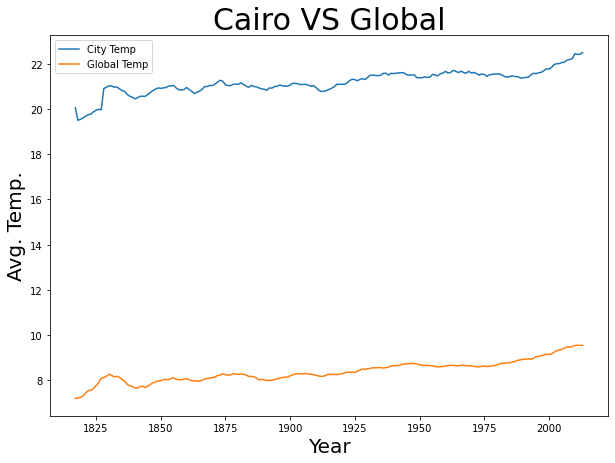

In [24]:
# Prepare plotting 
fig, ax = plt.subplots(figsize=(10, 7))

# Plot Customizations
ax.plot(cairo_df.year, city_moving_avg, label='City Temp')
ax.plot(cairo_df.year, glob_moving_avg, label='Global Temp')

ax.set_xlabel('Year', fontsize=20)
ax.set_ylabel('Avg. Temp.', fontsize=20)
ax.set_title("Cairo VS Global", fontsize=30)
ax.legend()

# Show Plot
plt.show()

## Conclusions 

* It seems that the average temperatures in cairo are way higher that the average global temperatures.
* Cairo\`s Temperature change over time is minimal as it seems to follow the same trend over the years.
* It also seems that the global and local temperatures are consistent over the years.